In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.patches import Rectangle
import seaborn as sns
from datetime import datetime

In [2]:
exams = pd.read_parquet('exams.parquet')
weekly_exams = pd.read_parquet('weekly_exams.parquet')

## Data Structure

In [3]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 533417 entries, 2020-07-01 07:28:47.017000 to 2022-06-30 23:44:45.623000
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   OrdDate         533413 non-null  datetime64[ns]
 1   SchDate         533417 non-null  datetime64[ns]
 2   EndDate         494088 non-null  datetime64[ns]
 3   acc             533417 non-null  string        
 4   Pt_Status       533417 non-null  category      
 5   ProtocolSystem  533417 non-null  category      
 6   DOB             533417 non-null  datetime64[ns]
 7   Age             533417 non-null  int64         
 8   sex             533417 non-null  category      
 9   ProtocolID      533417 non-null  int64         
 10  ProtocolCode    533391 non-null  category      
 11  Modality        533394 non-null  category      
 12  Division        533394 non-null  category      
 13  OrdExam         533394 non-null  category

In [4]:
all_ct_mask = (exams.Modality == 'CT')
all_mr_mask = (exams.Modality == 'MR')
gi_ct_iop_mask = (exams.Modality == 'CT') & (exams.Division == 'AB') & (exams.Pt_Status.isin(['O', 'I']))
gi_mr_iop_mask = (exams.Modality == 'MR') & (exams.Division == 'AB') & (exams.Pt_Status.isin(['O', 'I']))
th_ct_iop_mask = (exams.Modality == 'CT') & (exams.Division == 'TH') & (exams.Pt_Status.isin(['O', 'I']))
ne_mr_iop_mask = (exams.Modality == 'MR') & (exams.Division == 'NE') & (exams.Pt_Status.isin(['O', 'I']))
ne_ct_iop_mask = (exams.Modality == 'CT') & (exams.Division == 'NE') & (exams.Pt_Status.isin(['O', 'I']))
ms_mr_iop_mask = (exams.Modality == 'MR') & (exams.Division == 'MS') & (exams.Pt_Status.isin(['O', 'I']))
ms_ct_iop_mask = (exams.Modality == 'CT') & (exams.Division == 'MS') & (exams.Pt_Status.isin(['O', 'I']))
em_ct_mask = (exams.Modality == 'CT') & (exams.Pt_Status == 'E')
em_mr_mask = (exams.Modality == 'MR') & (exams.Pt_Status == 'E')
ap_mask = exams.ProtocolSystem == 'APE'
print(f"""{sum(all_ct_mask) = }, {sum(all_mr_mask) = }, 
{sum(gi_ct_iop_mask) = }, {sum(gi_mr_iop_mask) = }, 
{sum(th_ct_iop_mask) = }, 
{sum(ne_ct_iop_mask) = }, {sum(ne_mr_iop_mask) = }, 
{sum(ms_ct_iop_mask) = }, {sum(ms_mr_iop_mask) = }, 
{sum(em_ct_mask) = }, {sum(em_mr_mask) = }, 
{sum(ap_mask) = }, {sum(all_ct_mask & ap_mask) = }, {sum(all_mr_mask & ap_mask) = }""")

sum(all_ct_mask) = 343426, sum(all_mr_mask) = 169819, 
sum(gi_ct_iop_mask) = 69280, sum(gi_mr_iop_mask) = 27310, 
sum(th_ct_iop_mask) = 91160, 
sum(ne_ct_iop_mask) = 39689, sum(ne_mr_iop_mask) = 59620, 
sum(ms_ct_iop_mask) = 10466, sum(ms_mr_iop_mask) = 27904, 
sum(em_ct_mask) = 93593, sum(em_mr_mask) = 15836, 
sum(ap_mask) = 179588, sum(all_ct_mask & ap_mask) = 155573, sum(all_mr_mask & ap_mask) = 24008


In [5]:
exams.Modality.value_counts()

CT     343426
MR     169819
PT      11975
NM       8097
NC         50
ED         15
XR          7
US          3
FLP         1
MG          1
Name: Modality, dtype: int64

In [7]:
weekly_exams.columns

Index(['All CTs', 'All CTs AP', 'All MRs', 'All MRs AP', 'GI IO CTs',
       'GI IO CTs AP', 'GI IO MRs', 'GI IO MRs AP', 'TH IO CTs',
       'TH IO CTs AP', 'NE IO MRs', 'NE IO MRs AP', 'NE IO CTs',
       'NE IO CTs AP', 'MS IO CTs', 'MS IO CTs AP', 'MS IO MRs',
       'MS IO MRs AP', 'EM CTs', 'EM CTs AP'],
      dtype='object')

## Plotting Time Series

In [8]:
series_roots = ['All CTs', 'GI IO CTs', 'TH IO CTs', 'EM CTs']

In [9]:
ap_rates = pd.DataFrame({ f"{series} AP rate": weekly_exams[f"{series} AP"]/ weekly_exams[series] 
                          for series in series_roots })

In [10]:
smooth_ap_rates = ap_rates.rolling(window=3).mean()

In [11]:
weekly_exams['Other CTs'] = weekly_exams['All CTs']-weekly_exams['GI IO CTs']-weekly_exams['TH IO CTs']-weekly_exams['EM CTs']
#
weekly_ct_exams = weekly_exams[['GI IO CTs', 'TH IO CTs', 'EM CTs', 'Other CTs']]
weekly_ct_exams

,GI IO CTs,TH IO CTs,EM CTs,Other CTs
ProtDate,,,,
2020-07-05,260,665,578,419
2020-07-12,820,694,892,786
2020-07-19,712,890,823,707
2020-07-26,573,943,810,764
2020-08-02,704,820,834,853
...,...,...,...,...
2022-06-05,446,489,881,820
2022-06-12,461,507,943,763
2022-06-19,378,481,948,783


<AxesSubplot:xlabel='ProtDate'>

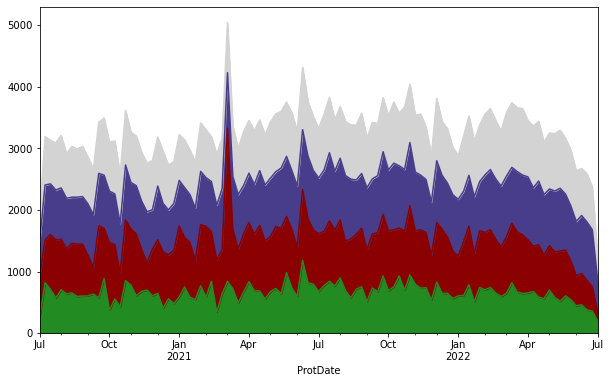

In [12]:
weekly_ct_exams.plot.area(stacked=True, figsize=(10,6), legend=False, 
                          style=['forestgreen', 'darkred', 'darkslateblue', 'lightgray'])

In [13]:
plt.style.use('seaborn')
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]}, sharex=True, dpi=600, figsize=(16,11))
fig.tight_layout()
smooth_ap_rates.plot(kind='line', ax=ax[0], y='All CTs AP rate', label="All CTs", lw=5, color='darkblue')
smooth_ap_rates.plot(kind='line', ax=ax[0], y='GI IO CTs AP rate', label="GI Inpatient/Outpatient CTs", lw=2, color='forestgreen')
smooth_ap_rates.plot(kind='line', ax=ax[0], y='TH IO CTs AP rate', label="Thoracic Inpatient/Outpatient CTs", lw=2, color='darkred')
smooth_ap_rates.plot(kind='line', ax=ax[0], y='EM CTs AP rate', label="Emergency CTs", lw=2, color='darkslateblue')
ax[0].axvline(x='2021-02-21', color='darkred', linestyle='dotted')
ax[0].annotate("Reconfigured\nthoracic CT", xy=('2021-02-23', 0.19))
ax[0].axvline(x='2021-05-25', color='forestgreen', linestyle='dotted')
ax[0].annotate("Reconfigured\nGI CT", xy=('2021-05-31', 0.04))
ax[0].axvline(x='2022-01-05', color='darkslateblue', linestyle='dotted')
ax[0].annotate("Reconfigured\nED CT", xy=('2022-01-10', 0.13))
ax[0].annotate("ED Order\nPage Changes", xy=('2021-07-01', 0.63))
ax[0].axvline(x='2022-05-01', color='#666666', linestyle='dotted')
ax[0].annotate("Contrast\nShortage", xy=('2022-05-05', 0.8))
ax[0].set_ybound(0, 1)
#ax[0].set_title("Proportion Automatically Protocoled")
ax[0].set_ylabel("Proportion Automatically Protocoled\n(3-week moving average)")
# ax[1].set_title("Protocoled Exam Volume")
ax[1].set_ylabel("Protocoled Exam Volume\n(Exams/week)")
# ax.legend().set_visible(False)
# ax2 = fig.add_axes([0.1, 0.65, 0.23, 0.23])
# ax2.pie(totals.values(), labels=totals.keys(), autopct='%1.1f%%', startangle=90, textprops={'fontsize':8, 'backgroundcolor': '#DDDDDD'}, colors=['forestgreen', 'darkred', 'darkslateblue', 'gray'])
# ax2.set_title(f"N={weekly_exams['All CTs'].sum()}", fontsize=10, x=0.5, y=-0.05, fontweight='bold')
weekly_ct_exams[1:-2].plot.area(ax=ax[1],stacked=True, 
                          style=['forestgreen', 'darkred', 'darkslateblue', 'gray'])
plt.xlabel("Week Exam Protocoled")
plt.savefig("autoprotocoling.pdf", transparent=False)
plt.show()

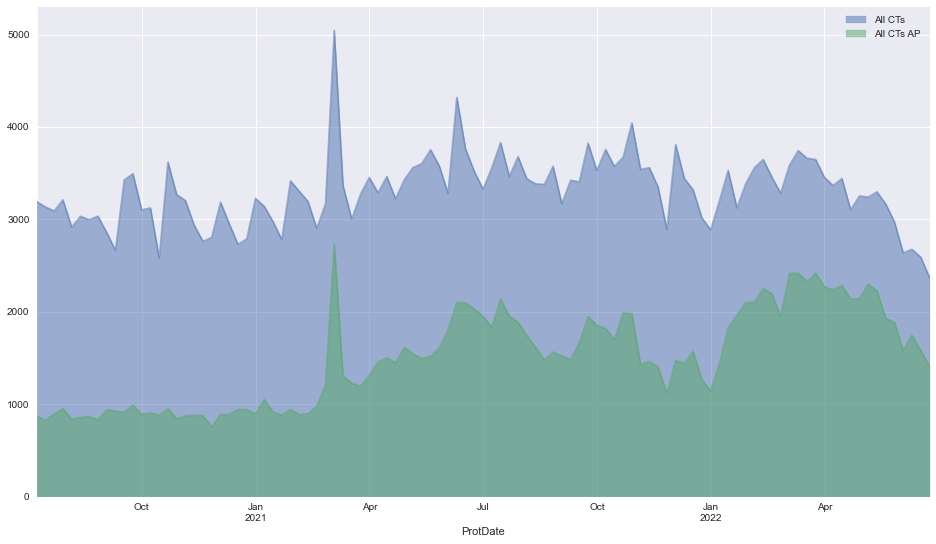

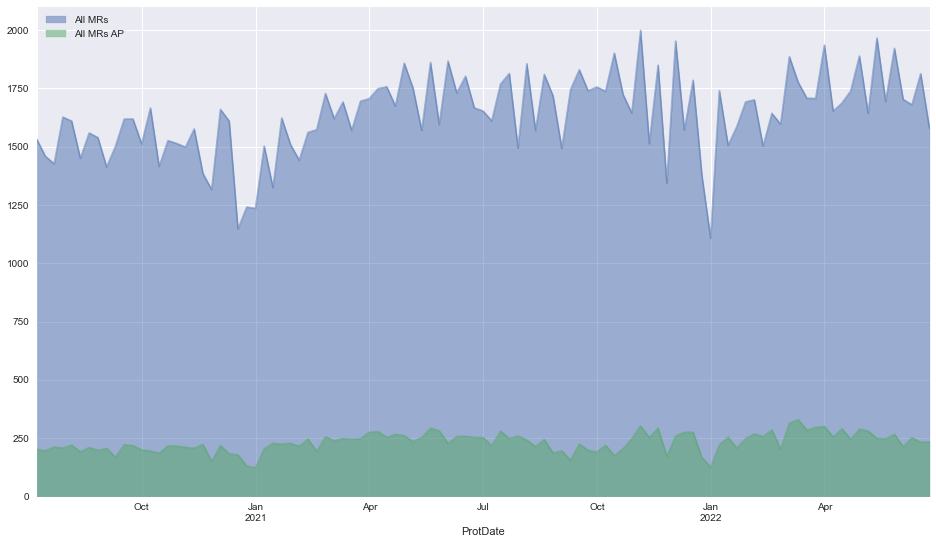

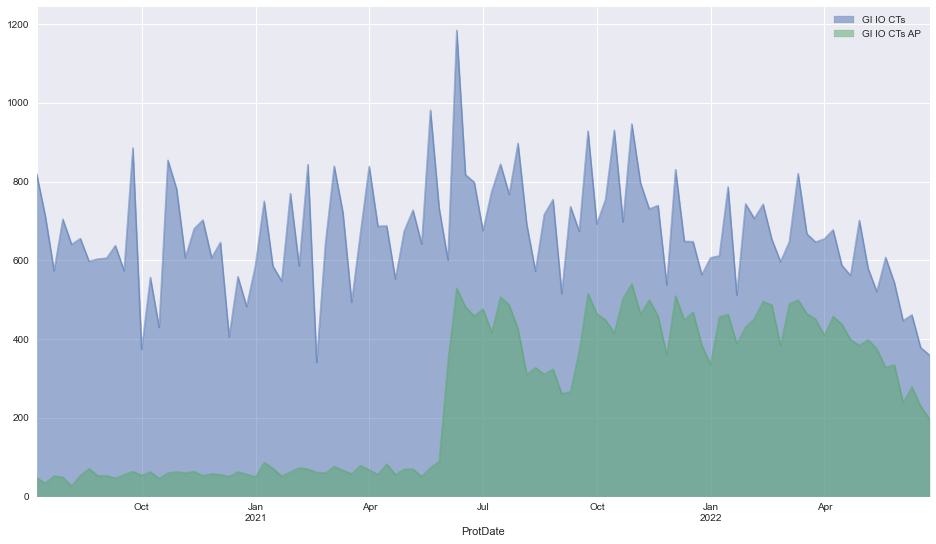

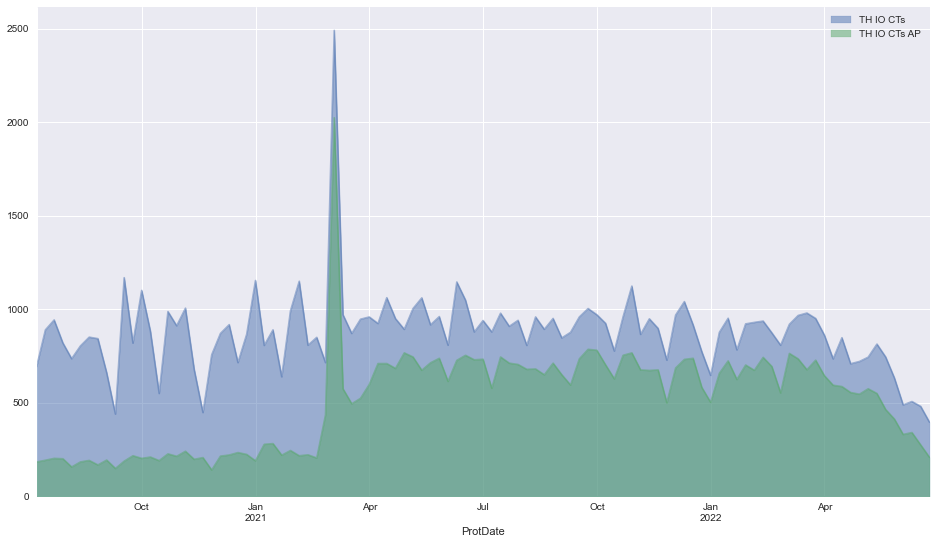

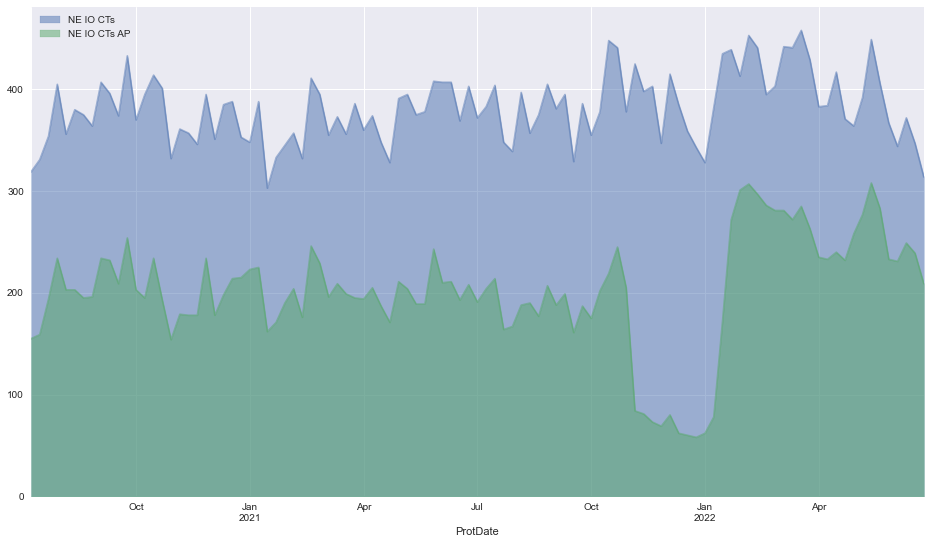

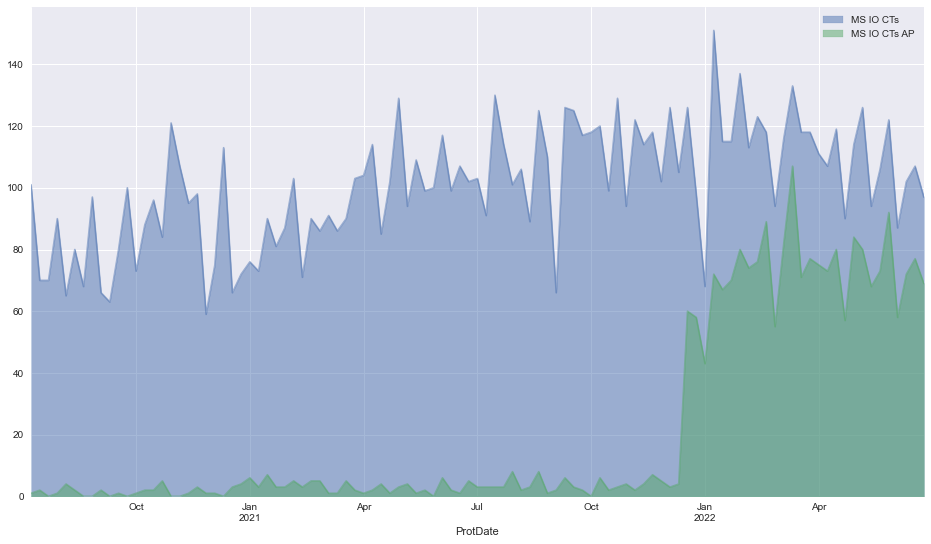

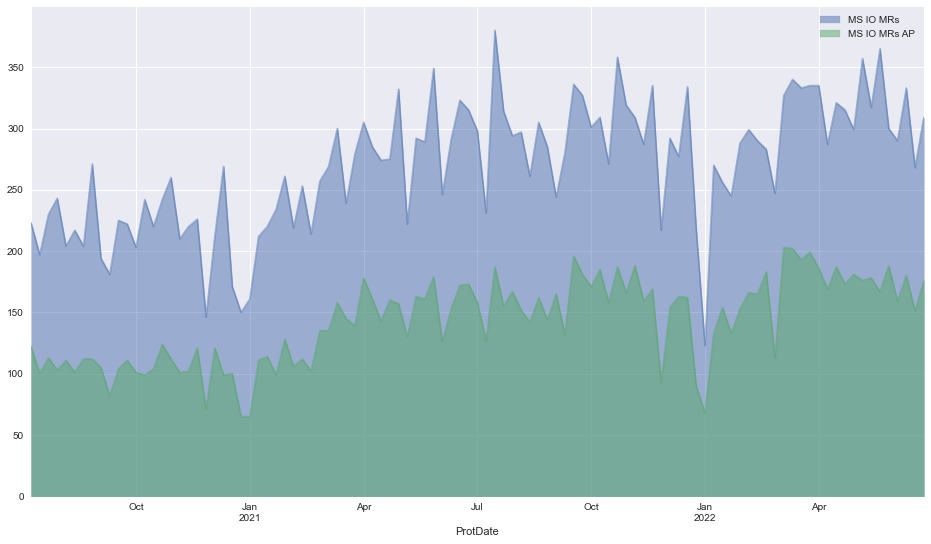

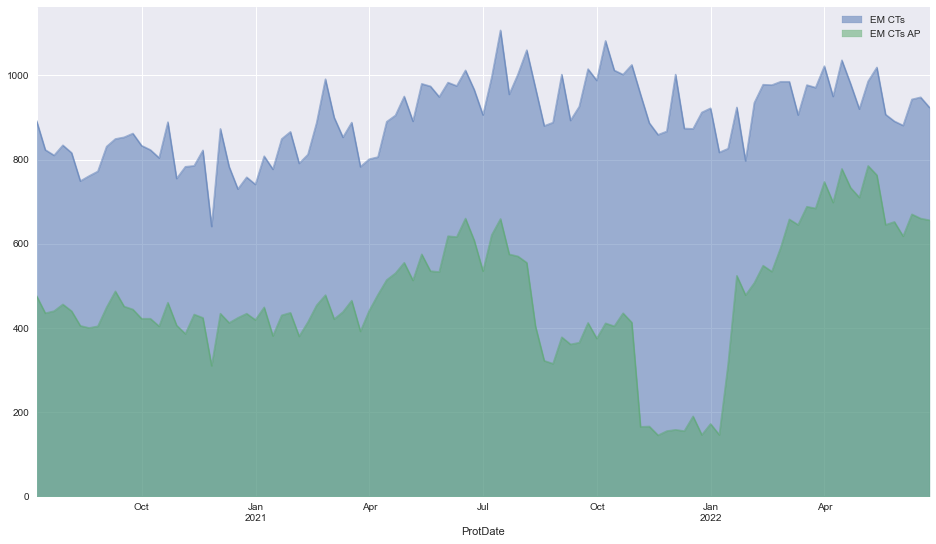

In [14]:
for series in ['All CTs', 'All MRs', 'GI IO CTs', 'TH IO CTs', 'NE IO CTs', 'MS IO CTs', 'MS IO MRs', 'EM CTs']:
    weekly_exams.loc['2020-07-12':'2022-06-26',[series, f"{series} AP"]].plot.area(stacked=False,figsize=(16,9))

## Interval Analysis

In [13]:
(exams['EndDate'] -exams['OrdDate']) > pd.Timedelta(5, 'D')

ProtDate
2020-07-01 07:28:47.017     True
2020-07-01 07:46:21.420     True
2020-07-01 08:09:08.967     True
2020-07-01 08:16:51.967     True
2020-07-01 08:17:01.133     True
2020-07-01 08:18:34.380     True
2020-07-01 08:19:24.350     True
2020-07-01 08:40:45.123     True
2020-07-01 09:10:16.577     True
2020-07-01 09:22:00.977     True
2020-07-01 10:28:00.077     True
2020-07-01 16:20:33.160     True
2020-07-01 16:21:46.760     True
2020-07-01 16:28:44.670     True
2020-07-01 16:35:08.037     True
2020-07-01 16:35:47.133     True
2020-07-01 16:44:45.063     True
2020-07-01 16:49:54.400     True
2020-07-01 16:51:43.470     True
2020-07-01 17:04:39.590     True
2020-07-01 17:04:52.533     True
2020-07-01 20:12:48.233     True
2020-07-01 20:15:02.073     True
2020-07-01 20:21:15.870     True
2020-07-02 07:28:13.243     True
2020-07-02 07:36:48.323     True
2020-07-02 07:37:20.780     True
2020-07-02 08:59:40.433    False
2020-07-02 11:54:57.743     True
2020-07-02 12:03:57.627     True
2

## Info on How We Got Here

In [ ]:
series_to_show = [('All CTs', all_ct_mask), ('All MRs', all_mr_mask), 
                  ('GI IO CTs', gi_ct_iop_mask), ('GI IO MRs', gi_mr_iop_mask), 
                  ('TH IO CTs', th_ct_iop_mask), 
                  ('NE IO MRs', ne_mr_iop_mask), ('NE IO CTs', ne_ct_iop_mask), 
                  ('MS IO CTs', ms_ct_iop_mask), ('MS IO MRs', ms_mr_iop_mask), 
                  ('EM CTs', em_ct_mask), ('EM MRs', em_mr_mask)]
for label, mask in series_to_show:
    weekly_exams[label] = exams[mask].resample('W')['acc'].count()
    weekly_exams[f"{label} AP"] = exams[mask & ap_mask].resample('W')['acc'].count()
    # exams[ne_ct_op_mask].resample('W')['acc'].count()
weekly_exams

In [ ]:
weekly_exams.drop(columns=['EM MRs', 'EM MRs AP'],inplace=True)

In [ ]:
weekly_exams.to_parquet('weekly_exams.parquet')
exams.to_parquet('exams.parquet')

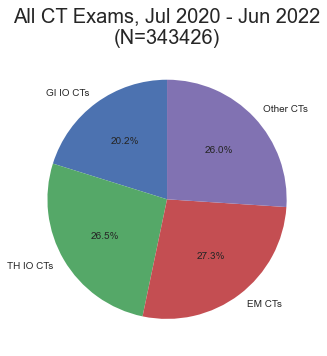

In [24]:
exams.columns

Index(['OrdDate', 'SchDate', 'EndDate', 'acc', 'Pt_Status', 'ProtocolSystem',
       'DOB', 'Age', 'sex', 'ProtocolID', 'ProtocolCode', 'Modality',
       'Division', 'OrdExam', 'PerfExam', 'Ex_stat', 'signs_symptoms'],
      dtype='object')

In [25]:
lspine_orders=exams[exams.OrdExam=='MR.XS.LSPINE'][['acc', 'ProtocolCode', 'OrdExam', 'PerfExam']]

In [29]:
lspine_orders[lspine_orders['PerfExam'] == 'MR.NE.LSPINE-']['ProtocolCode'].value_counts().head(20)

MR Spine Neuro without contrast                           7829
ED routine lumbar spine                                    350
Other                                                      242
MR Lumbar Spine MSK without Gado                           235
MR Pedi Back Pain                                          141
MR Spine Neuro Cord Compression Survey (rads to check)     105
MR Spine Neuro with contrast                               103
ED cord compression survey                                  94
MR Pedi Tethered Cord                                       82
MR Spine Neuro Trauma (Rad to check)                        31
MR Neuro Lumbar Spine C-                                    30
MR Neuro CSF Leak Survey                                    26
ED lumbar spine with gadolinium                             24
MR Spine Neuro Cord Compression Survey                      24
Postoperative spine with metallic hardware                  14
MR Spine Neuro Trauma                                  

In [62]:
exams.columns

Index(['OrdDate', 'SchDate', 'EndDate', 'acc', 'Pt_Status', 'ProtocolSystem',
       'DOB', 'Age', 'sex', 'ProtocolID', 'ProtocolCode', 'Modality',
       'Division', 'OrdExam', 'PerfExam', 'Ex_stat', 'signs_symptoms'],
      dtype='object')

In [123]:
orderables=exams[['Modality', 'Division', 'OrdExam', 'ProtocolCode']]
orderables=orderables[orderables['Division'].isin(['NE', 'AB', 'TH', 'MS', 'VA', 'XS'])]
orderables.reset_index(inplace=True, drop=True)
orderables.head()

,Modality,Division,OrdExam,ProtocolCode
0,MR,NE,MR.NE.BRAIN,Other
1,MR,XS,MR.XS.TOTSPINE,Other
2,MR,NE,MR.NE.BRAIN,MR Brain with contrast and SWI
3,MR,NE,MR.NE.NECKAG,MR Neck MRA Gado
4,MR,NE,MR.NE.HEADAG,MR Head MRA 3D TOF


In [125]:
orderables['Division'].value_counts()

NE           142084
AB           123054
TH           106012
XS            66664
MS            42252
VA            23742
NSN               0
TULOOCTR2         0
PETCTDX           0
PETCT             0
PET               0
3D                0
NMBRNTUM          0
NM                0
ED                0
CA                0
BRN               0
BONEMIN           0
BI                0
NMBRNSPC          0
Name: Division, dtype: int64

In [124]:
protocols=orderables.groupby(['Modality', 'Division', 'OrdExam', 'ProtocolCode'])['ProtocolCode'].count()
protocols=protocols.to_frame()

Modality  Division  OrdExam       ProtocolCode                               
CT        3D        CT.3D.ABDPEL  (Pre-DBS) Deep brain Stimulation               0
                                  3D TOF MRA neck + ax T1 FS neck precontrast    0
                                  3D TOF head MRA + MRV                          0
                                  3T epilepsy service (without contrast)         0
                                  3T epilepsy service + postcontrast 3D T1W      0
Name: ProtocolCode, dtype: int64

In [130]:
protocols=protocols[protocols.ProtocolCode > 0]
protocols.head(20)

ProtocolCode
Modality Division OrdExam        ProtocolCode                                            
CT       AB       CT.AB.ABDCOLOD Other                                                234
                                 Routine I+O+                                           1
                                 Routine/Cancer FU I-O+                                 1
                  CT.AB.ABDCOLOS CT Colonography with IV contrast                      32
                                 CT Colonography without IV contrast                   56
                                 Other                                                 88
                  CT.AB.ABDENTER Blunt Trauma AbdPel I+                                 1
                                 CT Enterography with IV contrast with oral            44
                                 CTA Aorta AbdPel WWO                                   1
                                 CTA Mesenteric                                         1
                                 CTA Mesenteric/GI Bleed                                1
                                 Enterography I+                                      268
                                 Enterography I-                                        8
                                 Other                                                 14
                                 Routine/Cancer FU I-O-                                 1
                  CT.AB.ABDPEL   ART/PV I+O+                                            1
                                 Abdomen Renal Donor                                    1
                                 Adrenal Mass                                          56
                                 Bladder Cancer                                       697
                                 Bladder Cancer I+O+                                  141

In [138]:
protocols.reindex(index=list(range(1715)), copy=True)

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

In [137]:
print(list(range(5)))

[0, 1, 2, 3, 4]


In [87]:
exams((exams['Modality'] == 'CT') & (exams.index > '2022-02-01'))['ProtocolSystem'].value_counts()

TypeError: 'DataFrame' object is not callable

In [90]:
exams[(exams.index > '2022-02-01') & (exams['Modality'] == 'CT')]['ProtocolSystem'].value_counts()

APE        44189
RadDash    24571
Name: ProtocolSystem, dtype: int64

In [91]:
exams[(exams.index < '2021-02-01') & (exams['Modality'] == 'CT')]['ProtocolSystem'].value_counts()

RadDash    66166
APE        27378
Name: ProtocolSystem, dtype: int64

In [12]:
exams[(exams['Modality']=='CT')]['ProtocolSystem'].value_counts(dropna=False)

RadDash    187853
APE        155573
Name: ProtocolSystem, dtype: int64

In [14]:
exams[(exams['Modality']=='CT')]['Pt_Status'].value_counts(dropna=False)

O    174254
E     93593
I     75579
Name: Pt_Status, dtype: int64

In [15]:
exams[(exams['Modality']=='CT') & exams['EndDate'].isna()]['Pt_Status'].value_counts(dropna=False)

I    11387
E     8643
O     5638
Name: Pt_Status, dtype: int64

In [20]:
exams[(exams['Modality']=='CT')].groupby(['ProtocolSystem', 'Pt_Status'])['OrdDate'].count()

ProtocolSystem  Pt_Status
APE             E             49055
                I             36443
                O             70075
RadDash         E             44538
                I             39136
                O            104179
Name: OrdDate, dtype: int64

In [21]:
exams[(exams['Modality']=='CT') & exams['EndDate'].isna()].groupby(['ProtocolSystem', 'Pt_Status'])['OrdDate'].count()

ProtocolSystem  Pt_Status
APE             E            4573
                I            6476
                O            2168
RadDash         E            4070
                I            4911
                O            3470
Name: OrdDate, dtype: int64

In [13]:
exams[(exams['Modality']=='CT') & exams['EndDate'].isna()]['ProtocolSystem'].value_counts(dropna=False)

APE        13217
RadDash    12451
Name: ProtocolSystem, dtype: int64

In [7]:
# Inpatient CTs
cts_inpt = exams[(exams['Modality'] == 'CT') & (exams['Pt_Status'].isin(['I', 'E']))]
cts_inpt = cts_inpt[['OrdDate', 'EndDate', 'ProtocolSystem']]
cts_inpt['Ord_Prot_Interval'] = cts_inpt.index - cts_inpt['OrdDate']
# cts_inpt['PrePost'] = pd.cut(cts_inpt.index, times, labels=['Pre', 'Post'])
cts_inpt.reset_index(drop=False, inplace=True)
# Outpatient CTs
cts_outpt = exams[(exams['Modality'] == 'CT') & (exams['Pt_Status']=='O')]
cts_outpt = cts_outpt[['OrdDate', 'SchDate', 'EndDate', 'ProtocolSystem']]
cts_outpt['Prot_End_Interval'] = cts_outpt['EndDate']- cts_outpt.index
# cts_outpt['PrePost'] = pd.cut(cts_outpt.index, times, labels=['Pre', 'Post'])
cts_outpt.reset_index(drop=False, inplace=True)

In [8]:
cts_inpt['ProtocolSystem'].value_counts(dropna=False)

APE        85498
RadDash    83674
Name: ProtocolSystem, dtype: int64

In [9]:
cts_outpt['ProtocolSystem'].value_counts(dropna=False)

RadDash    104179
APE         70075
Name: ProtocolSystem, dtype: int64

In [11]:
cts_outpt[(cts_outpt['EndDate'] - cts_outpt['OrdDate']) > pd.Timedelta(1, 'W')]['ProtocolSystem'].value_counts(dropna=False)

RadDash    76541
APE        52471
Name: ProtocolSystem, dtype: int64

In [33]:
cts_outpt['Prot_End_Interval_sec'] = cts_outpt['Prot_End_Interval'].dt.total_seconds()
cts_outpt['Prot_End_Interval_days'] = cts_outpt['Prot_End_Interval'].dt.days

In [22]:
# cts_outpt['PreOrdered'] = cts_outpt[(cts_outpt.SchDate - cts_outpt.OrdDate) > pd.Timedelta(1, 'W')]
cts_outpt_preord = cts_outpt[(cts_outpt['EndDate'] - cts_outpt['OrdDate']) > pd.Timedelta(1, 'W')][['EndDate', 'ProtocolSystem', 'Prot_End_Interval']]
outpt_bins = [ pd.Timedelta(n, 'D') for n in range(0, 9) ]
int_cat_labels = [">7d prior", "6–7d prior", "5–6d prior", "4–5d prior", "3–4d prior", "2–3d prior", "1–2d prior", "Same day"]
cts_outpt_preord['IntervalCat'] = pd.cut(cts_outpt_preord['Prot_End_Interval'].clip(upper=pd.Timedelta(8, 'D')), outpt_bins, labels=int_cat_labels[::-1])
cts_outpt_preord['IntervalCat'] = cts_outpt_preord['IntervalCat'].cat.reorder_categories(int_cat_labels)
cts_outpt_preord['ProtocolSystem'].value_counts()

RadDash    76541
APE        52471
Name: ProtocolSystem, dtype: int64

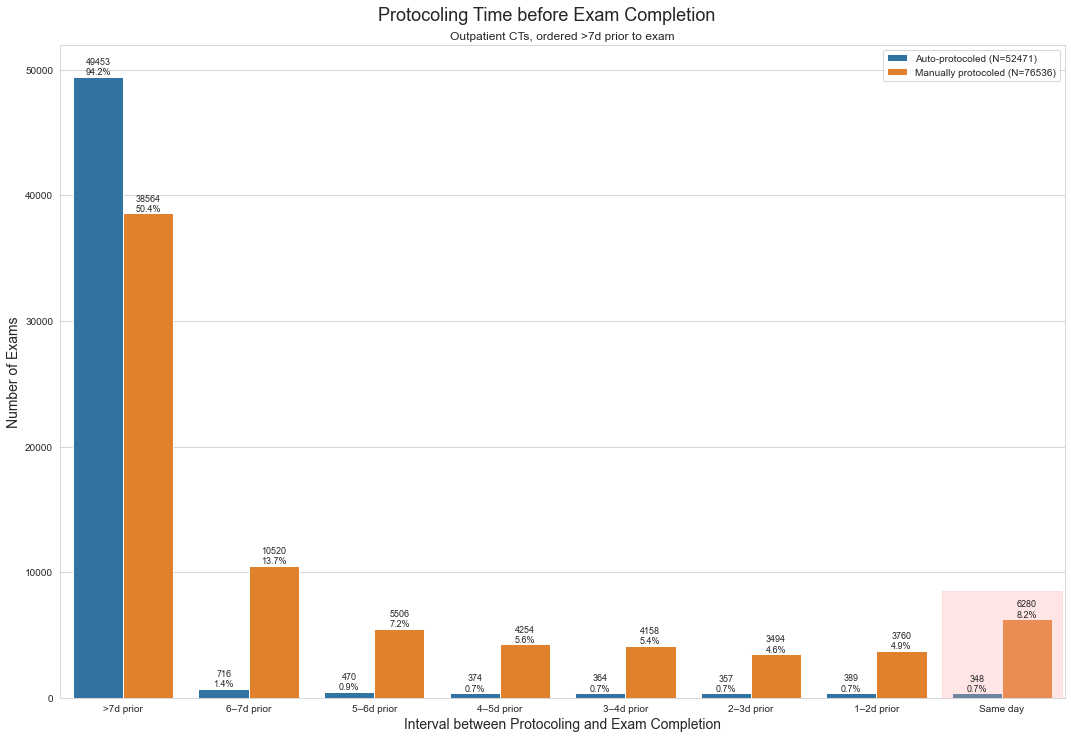

In [32]:
plt.figure(figsize=(18,12))
ax=sns.countplot(x='IntervalCat', hue='ProtocolSystem', data=cts_outpt_preord)
plt.suptitle("Protocoling Time before Exam Completion", fontsize=18, y=0.925)
plt.title("Outpatient CTs, ordered >7d prior to exam", fontsize=12)
plt.ylabel("Number of Exams", fontsize=14)
plt.xlabel("Interval between Protocoling and Exam Completion", fontsize=14)
rd_tot, ape_tot = cts_outpt_preord['ProtocolSystem'].value_counts()
rd_tot -= 5
plt.legend(labels=[f'Auto-protocoled (N={ape_tot})', f'Manually protocoled (N={rd_tot})'], loc='upper right')
all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
sums=[sum(xgroup) for xgroup in all_heights]
for bars, tot in zip(ax.containers, sums):
    for i, p in enumerate(bars):
        percentage = f"{p.get_height()}\n{(100 * p.get_height() / tot) :.1f}%"
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=9, ha='center', va='bottom')
ax.add_patch(Rectangle((6.52, 0), 0.96, 8500, color='#FFAAAA', alpha=0.3))
plt.savefig('OutpatientProtocolingIntervals.svg', dpi=600)
plt.show()

In [13]:
cts_outpt_preord[cts_outpt_preord['ProtocolSystem']=='RadDash'].IntervalCat.value_counts(dropna=False)

>7d prior     38564
6–7d prior    10520
Same day       6280
5–6d prior     5506
4–5d prior     4254
3–4d prior     4158
1–2d prior     3760
2–3d prior     3494
NaN               5
Name: IntervalCat, dtype: int64

In [12]:
49453+716+470+389+374+364+357+348

52471

In [15]:
cts_inpt.head()

,ProtDate,OrdDate,EndDate,ProtocolSystem,Ord_Prot_Interval
0,2020-07-17 14:11:30.360,2020-01-03 13:09:11,2020-07-17 17:35:07,RadDash,196 days 01:02:19.360000
1,2020-07-29 16:59:17.740,2020-03-11 16:54:22,2020-08-06 16:52:52,RadDash,140 days 00:04:55.740000
2,2020-09-04 16:19:07.780,2020-02-11 11:05:56,2020-09-08 11:40:14,RadDash,206 days 05:13:11.780000
3,2020-10-23 15:38:00.497,2020-02-03 09:01:02,NaT,APE,263 days 06:36:58.497000
4,2020-07-01 00:09:00.773,2020-07-01 00:07:33,2020-07-01 20:18:38,APE,0 days 00:01:27.773000


In [20]:
outpt_bins_in = [ pd.Timedelta(n, 'h') for n in range(0, 8) ]
int_cat_labels_in = ['0–1h', '1–2h', '2–3h', '3–4h', '4–5h', '5–6h', '6+h']
cts_inpt['IntervalCat'] = pd.cut(cts_inpt['Ord_Prot_Interval'].clip(upper=pd.Timedelta(7, 'h')), outpt_bins_in, labels=int_cat_labels_in)
# cts_inpt['IntervalCat'] = cts_inpt['IntervalCat'].cat.reorder_categories(int_cat_labels_in)
cts_inpt=cts_inpt[~ cts_inpt['IntervalCat'].isna()]
cts_inpt['IntervalCat'].value_counts(dropna=False)

0–1h    148868
1–2h      9999
6+h       4040
2–3h      3350
3–4h      1567
4–5h       816
5–6h       511
Name: IntervalCat, dtype: int64

In [22]:
cts_inpt.groupby('ProtocolSystem').IntervalCat.value_counts(dropna=False)

ProtocolSystem      
APE             0–1h    85396
                6+h        47
                1–2h       16
                3–4h       10
                2–3h        6
                5–6h        2
                4–5h        1
RadDash         0–1h    63472
                1–2h     9983
                6+h      3993
                2–3h     3344
                3–4h     1557
                4–5h      815
                5–6h      509
Name: IntervalCat, dtype: int64

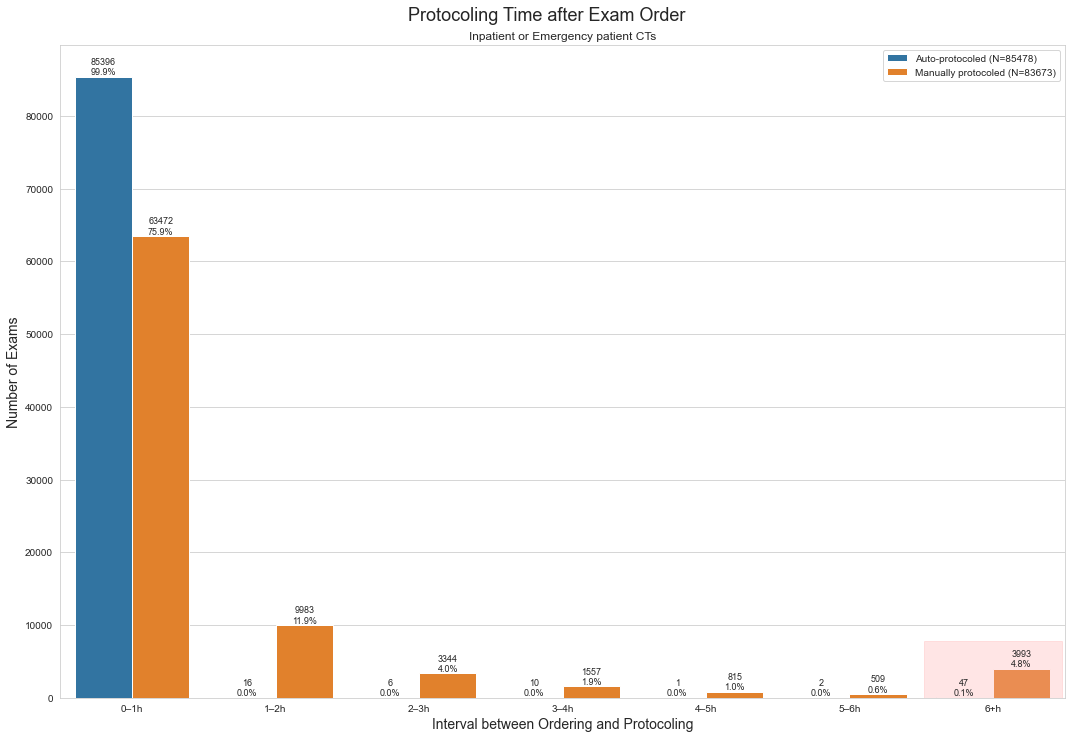

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,12))
sns.color_palette("Set2")
ax=sns.countplot(x='IntervalCat', hue='ProtocolSystem', data=cts_inpt)
plt.suptitle("Protocoling Time after Exam Order", fontsize=18, y=0.925)
plt.title("Inpatient or Emergency patient CTs", fontsize=12)
plt.ylabel("Number of Exams", fontsize=14)
plt.xlabel("Interval between Ordering and Protocoling", fontsize=14)
ape_tot, rd_tot = cts_inpt['ProtocolSystem'].value_counts()
plt.legend(labels=[f'Auto-protocoled (N={ape_tot})', f'Manually protocoled (N={rd_tot})'], loc='upper right')
all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
sums=[sum(xgroup) for xgroup in all_heights]
for bars, tot in zip(ax.containers, sums):
    for i, p in enumerate(bars):
        percentage = f"{p.get_height()}\n{(100 * p.get_height() / tot) :.1f}%"
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=9, ha='center', va='bottom')
ax.add_patch(Rectangle((5.52, 0), 0.96, 7800, color='#FFAAAA', alpha=0.3))
plt.savefig('InpatientEmergencyProtocolingIntervals.svg', dpi=600)
plt.show()

<Figure size 432x288 with 0 Axes>

In [75]:
cts_outpt['SameDay'] = cts_outpt['Prot_End_Interval'] < pd.Timedelta(1, 'D')
cts_outpt['PreOrdered'] = (cts_outpt['EndDate'] - cts_outpt['OrdDate']) > pd.Timedelta(3, 'D')

In [78]:
pre_post_groups=cts_outpt[cts_outpt['PreOrdered']].groupby(['PrePost', 'ProtocolSystem'])['SameDay']
pre_post_groups.describe()

count unique    top   freq
PrePost ProtocolSystem                            
Pre     APE              4434      2  False   4401
        RadDash         31073      2  False  29214
Post    APE             14062      2  False  13973
        RadDash          9792      2  False   8494

In [92]:
cts_outpt[cts_outpt['PreOrdered']]['PrePost'].value_counts()

Pre     35507
Post    23854
Name: PrePost, dtype: int64

In [97]:
non_same_day_counts=pre_post_groups.value_counts()
#non_same_day = {'Pre': (4538+28995)/36717, 'Post': (14278+8184)/24606, 
#                'APE': (4538+14278)/(4603+14467), 'RadDash': (28995+8184)/(32114+10139),
#                'APE_Pre': 4538/4603, 'APE_Post': 14278/14467, 'RadDash_Pre': 28995/32114, 'RadDash_Post': 8184/10139}
pre_total = non_same_day_counts[('Pre', 'APE', False)] + non_same_day_counts[('Pre', 'RadDash', False)] \
    + non_same_day_counts[('Pre', 'RadDash', True)] + non_same_day_counts[('Pre', 'APE', True)]
post_total = non_same_day_counts[('Post', 'APE', False)] + non_same_day_counts[('Post', 'RadDash', False)] \
    + non_same_day_counts[('Post', 'RadDash', True)] + non_same_day_counts[('Post', 'APE', True)]
non_same_day_pcts={'Pre': (non_same_day_counts[('Pre', 'APE', True)] + non_same_day_counts[('Pre', 'RadDash', True)]) / pre_total,
                    'Post': (non_same_day_counts[('Post', 'APE', True)] + non_same_day_counts[('Post', 'RadDash', True)]) / post_total}
print(non_same_day_counts,non_same_day_pcts)

PrePost  ProtocolSystem  SameDay
Pre      APE             False       4401
                         True          33
         RadDash         False      29214
                         True        1859
Post     APE             False      13973
                         True          89
         RadDash         False       8494
                         True        1298
Name: SameDay, dtype: int64 {'Pre': 0.053285267693694204, 'Post': 0.05814538442189989}


In [45]:
(cts_outpt
 .groupby('IntervalCat')['PrePost']
 .value_counts(normalize=True)
 .mul(100)
 .rename('Percent')
 .reset_index()
 .pipe((sns.catplot, 'data'), x='IntervalCat', y='Percent', hue='PrePost', kind='bar'))
# sns.countplot(x='IntervalCat', hue='PrePost', data=cts_outpt)

ValueError: Could not interpret input 'PrePost'

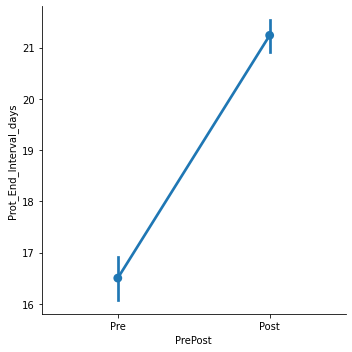

In [34]:
sns.catplot(x='PrePost', y='Prot_End_Interval_days', data=cts_outpt, kind='point')

<AxesSubplot:ylabel='Frequency'>

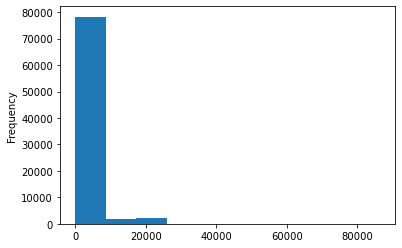

In [99]:
cts_inpt['Ord_Prot_Interval'].clip(upper=pd.Timedelta(5, 'H')).dt.seconds.plot.hist()

In [22]:
cts_inpt.ProtocolSystem.value_counts()

APE        45464
RadDash    37009
Name: ProtocolSystem, dtype: int64

In [13]:
cts_inpt[cts_inpt['Ord_Prot_Interval']>pd.Timedelta(1, 'D')]

,ProtDate,OrdDate,EndDate,ProtocolSystem,Ord_Prot_Interval,PrePost
0,2020-07-17 14:11:30.360,2020-01-03 13:09:11,2020-07-17 17:35:07,RadDash,196 days 01:02:19.360000,Pre
1,2020-07-29 16:59:17.740,2020-03-11 16:54:22,2020-08-06 16:52:52,RadDash,140 days 00:04:55.740000,Pre
2,2020-09-04 16:19:07.780,2020-02-11 11:05:56,2020-09-08 11:40:14,RadDash,206 days 05:13:11.780000,Pre
3,2020-10-23 15:38:00.497,2020-02-03 09:01:02,NaT,APE,263 days 06:36:58.497000,Pre
273,2020-07-02 08:05:01.017,2020-06-26 10:43:28,NaT,APE,5 days 21:21:33.017000,Pre
...,...,...,...,...,...,...
78375,2022-06-13 08:33:41.747,2022-06-11 15:20:22,NaT,RadDash,1 days 17:13:19.747000,Post
79228,2022-06-16 17:23:53.567,2022-06-15 16:26:29,2022-06-16 18:26:36,RadDash,1 days 00:57:24.567000,Post
80035,2022-06-20 14:12:00.620,2022-05-15 13:45:28,NaT,APE,36 days 00:26:32.620000,Post
80193,2022-06-21 08:43:15.410,2022-06-18 14:08:46,2022-06-21 09:09:12,RadDash,2 days 18:34:29.410000,Post


In [54]:
cts_inpt.head()

,ProtDate,OrdDate,EndDate,ProtocolSystem,Interval,PrePost
0,2020-07-17 14:11:30.360,2020-01-03 13:09:11,2020-07-17 17:35:07,RadDash,196 days 01:02:19.360000,Pre
1,2020-07-29 16:59:17.740,2020-03-11 16:54:22,2020-08-06 16:52:52,RadDash,140 days 00:04:55.740000,Pre
2,2020-09-04 16:19:07.780,2020-02-11 11:05:56,2020-09-08 11:40:14,RadDash,206 days 05:13:11.780000,Pre
3,2020-10-23 15:38:00.497,2020-02-03 09:01:02,NaT,APE,263 days 06:36:58.497000,Pre
4,2020-07-01 00:09:00.773,2020-07-01 00:07:33,2020-07-01 20:18:38,APE,0 days 00:01:27.773000,Pre


In [41]:
outpt_bins = [ pd.Timedelta(n, 'D') for n in range(0, 9) ]
cts_outpt['IntervalCat'] = pd.cut(cts_outpt.Prot_End_Interval.clip(upper=pd.Timedelta(14, 'D')), bins=outpt_bins, labels=['0-1d', '1-2d', '2-3d', '3-4d', '4-5d', '5-6d', '6-7d', '>7d'])
cts_outpt['IntervalCat'].value_counts()

>7d     7398
6-7d    6167
5-6d    3289
0-1d    3275
4-5d    2700
3-4d    2634
1-2d    2049
2-3d    1968
Name: IntervalCat, dtype: int64

In [51]:
# We only want CTs ordered more than a week before the scheduling date


## Neuro Protocols

In [44]:
pt=exams[exams['ProtocolID'].isin([41, 47, 242, 735])].pivot_table(index=['ProtocolID', 'ProtocolCode'], values='OrdDate', columns='ProtocolSystem', aggfunc='count')
# pt=pt[pt.ProtocolSystem > 0]
pt = pt[(pt.APE>0) | (pt.RadDash>0)]
pt

,ProtocolSystem,APE,RadDash
ProtocolID,ProtocolCode,,
41,MR Brain with contrast and SWI,778,19679
47,MR Brain Pituitary,1276,1813
242,MR Brain MS protocol,1038,880
735,3T epilepsy service + postcontrast 3D T1W,78,264


In [46]:
exams[(exams.Modality == 'MR') & (exams.Division == 'NE')]['ProtocolCode'].value_counts().head(20)

MR Brain with contrast and SWI                                    20457
Other                                                              7266
MR Brain routine without                                           4839
MR Brain Pituitary                                                 3089
MRA 3D TOF head without contrast                                   2294
ED routine brain                                                   2096
MR Brain MS protocol                                               1918
ED routine brain (without contrast)                                1809
MR Head MRA 3D TOF                                                 1789
ED MRA head                                                        1693
ED brain with gado                                                 1467
ED MRA neck with gado                                              1400
ED stroke default (routine brain, TOF MRA head, gado MRA neck)     1237
Neurodegenerative/TBI/memory loss (without contrast)            